In [58]:
import pandas as pd
import seaborn as sns
import xmltodict
import matplotlib.pyplot as plt

In [59]:
data = pd.DataFrame(columns = ['Ruta', 'Tipo', 'Longitud', 'Salida', 'Llegada', 'Pérdida'])

routes=[]
vtypes=[]
r_lengths=[]
departs=[]
arrivals=[]
timeLosses=[]

for i in range(31):
    xml_data = open('results/trip.info_%d.xml'%i, 'r').read()
    xmlDict = xmltodict.parse(xml_data)  # Parse XML
    
    for trip in xmlDict['tripinfos']['tripinfo']:
        routes.append(trip['@id'].split('.')[0])
        vtypes.append(trip['@vType'])
        r_lengths.append(trip['@routeLength'])
        departs.append(trip['@depart'])
        arrivals.append(trip['@arrival'])
        timeLosses.append(trip['@timeLoss'])
    
data['Ruta']=routes
data['Tipo']=vtypes
data['Longitud']=r_lengths
data['Salida']=departs
data['Llegada']=arrivals
data['Pérdida']=timeLosses

In [60]:
data['Longitud']=data['Longitud'].astype(float)
data['Salida']=data['Salida'].astype(float)
data['Llegada']=data['Llegada'].astype(float)
data['Pérdida']=data['Pérdida'].astype(float)

In [61]:
data

,Ruta,Tipo,Longitud,Salida,Llegada,Pérdida
0,Cl170_or_auto_sur_central,bog_driver,2230.74,10.0,182.0,12.10
1,Cl170_occ_auto_sur_central,bog_driver,2652.38,20.0,215.0,32.64
2,Cl170_occ_auto_sur_central,bog_driver,2652.38,14.0,218.0,29.10
3,Cl170_occ_auto_sur_lateral,bog_driver,2630.10,9.0,225.0,26.65
4,Cl170_or_auto_sur_central,bog_driver,2230.74,47.0,237.0,13.01
...,...,...,...,...,...,...
632330,ruta_auto_norte_lateral_array,bog_ruta,7915.76,9867.0,10787.0,192.46
632331,camion_bog_chia_lateral,bog_camion,13144.10,9117.0,10789.0,524.35
632332,flota_bogota_terminal_chia,bog_flota,12743.61,8613.0,10789.0,1428.64
632333,auto_norte_lateral_chia,bog_driver,13146.20,9462.0,10796.0,487.13


In [89]:
data['Sección'] = pd.cut(data['Llegada'], [0,3600,7200,10800], labels = [1,2,3])

<AxesSubplot: xlabel='Ruta', ylabel='Pérdida'>

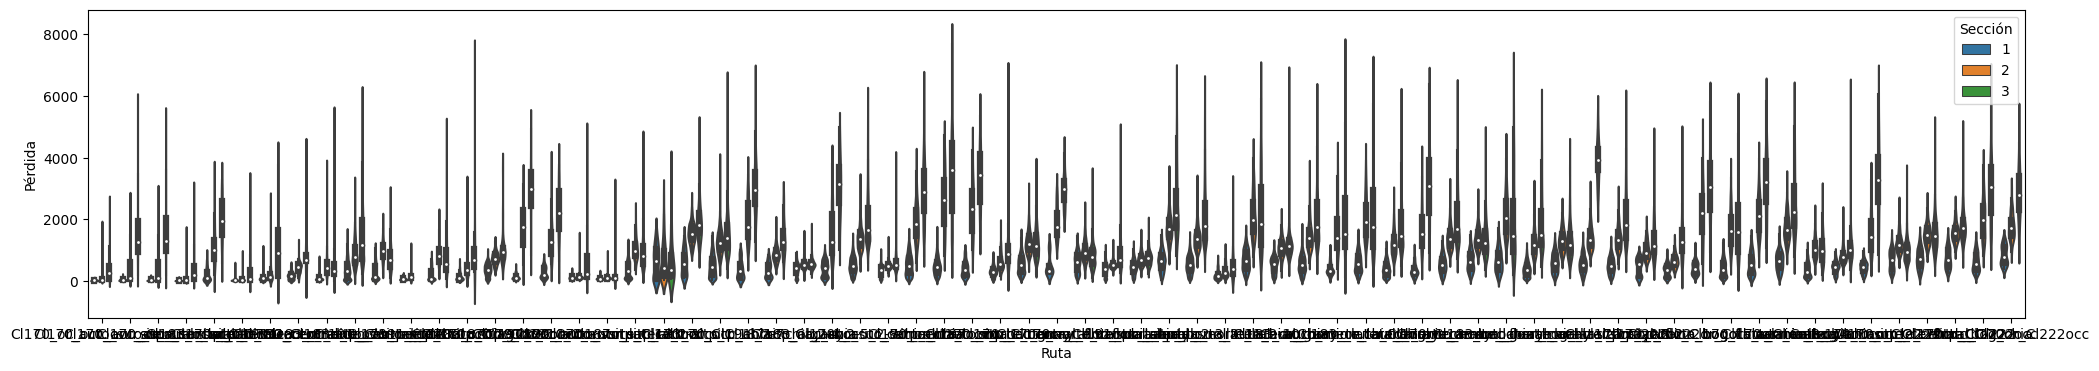

In [90]:
fig, ax = plt.subplots(1,1,figsize=(25,4))
sns.violinplot(data = data, x = 'Ruta', y='Pérdida', hue = 'Sección')

In [91]:
rutas = data['Ruta'].unique()
rutas.sort()
rutas

array(['Auto_norte_central_Cl222', 'Chia_Cl170_occ', 'Chia_Cl183_occ',
       'Chia_Cl183_or', 'Cl170_occ_auto_sur_central',
       'Cl170_occ_auto_sur_lateral', 'Cl170_or_auto_sur_central',
       'Cl170_or_auto_sur_lateral', 'Cl170_or_chia',
       'Cl183_occ_auto_sur_central', 'Cl183_occ_chia',
       'Cl183_or_auto_sur_central', 'Cl183_or_chia',
       'Cl192_occ_auto_sur_central', 'Cl192_occ_auto_sur_lateral',
       'auto_norte_Cl183_occ', 'auto_norte_central_Cl170_occ',
       'auto_norte_central_Cl170_oriente', 'auto_norte_central_Cl183_or',
       'auto_norte_central_array', 'auto_norte_central_chia',
       'auto_norte_central_guaymaral', 'auto_norte_lateral_array',
       'auto_norte_lateral_chia', 'auto_norte_lateral_guay',
       'camion_bog_chia', 'camion_bog_chia_lateral',
       'camion_chia_bog_central', 'camion_chia_bog_lateral',
       'chia_auto_sur_central', 'chia_auto_sur_lateral', 'chia_cl170_or',
       'cl170_occ_chia', 'float_chia_cl170occ_NS', 'flota_Chia_Bog

In [92]:
rutas_importantes = ['auto_norte_central_chia','auto_norte_lateral_chia','ruta_auto_norte_central_Cl222', 'ruta_auto_norte_central_array',
       'ruta_auto_norte_lateral_array', '']

[Text(0, 0, 'auto_norte_central_chia'),
 Text(1, 0, 'ruta_auto_norte_central_array'),
 Text(2, 0, 'ruta_auto_norte_lateral_array'),
 Text(3, 0, 'auto_norte_lateral_chia'),
 Text(4, 0, 'ruta_auto_norte_central_Cl222')]

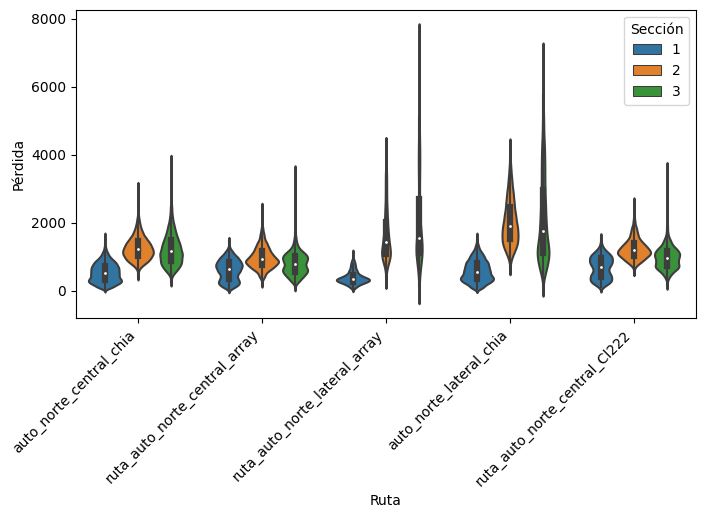

In [93]:
mask = data['Ruta'].isin(rutas_importantes)

fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.violinplot(data = data[mask], x = 'Ruta', y='Pérdida', hue = 'Sección')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')